In [2]:
import os
os.chdir("/Users/amiraboubezari/Downloads")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load data
df = pd.read_csv("EQR_master_clean.csv")

# Preview
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33846 entries, 0 to 33845
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   transaction_unique_id                  33846 non-null  object 
 1   seller_company_name                    33846 non-null  object 
 2   customer_company_name                  33846 non-null  object 
 3   transaction_begin_date                 33846 non-null  object 
 4   transaction_end_date                   33846 non-null  object 
 5   trade_date                             33840 non-null  object 
 6   type_of_rate                           33834 non-null  object 
 7   time_zone                              33846 non-null  object 
 8   point_of_delivery_balancing_authority  33846 non-null  object 
 9   point_of_delivery_specific_location    33740 non-null  object 
 10  class_name                             28735 non-null  object 
 11  te

In [3]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

df.shape, df.dtypes.value_counts(), df.isna().sum().sort_values(ascending=False).head(10)
df['transaction_unique_id'].nunique()  # sanity for dup IDs

23880

In [4]:
df['trade_date_year_mo'] = pd.to_datetime(df['trade_date_year_mo'], format='%Y-%m', errors='coerce')
df = df.sort_values('trade_date_year_mo')

In [5]:
monthly = (
    df.groupby('trade_date_year_mo')
      .apply(lambda x: (x['converted_price']*x['standardized_quantity']).sum()
                       / x['standardized_quantity'].sum())
      .reset_index(name='weighted_avg_price')
)
df = df.merge(monthly, on='trade_date_year_mo', how='left')


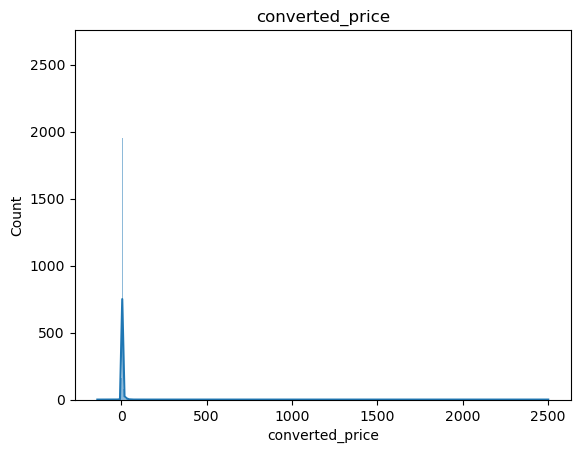

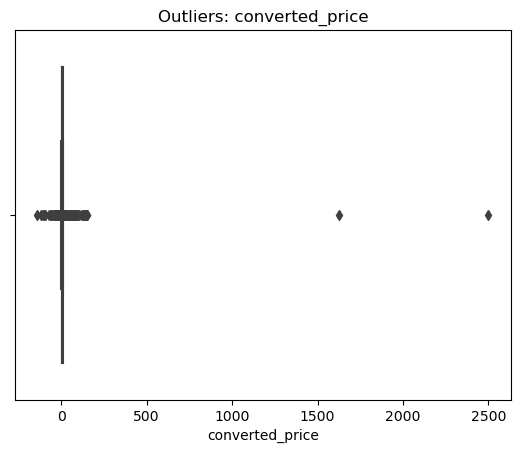

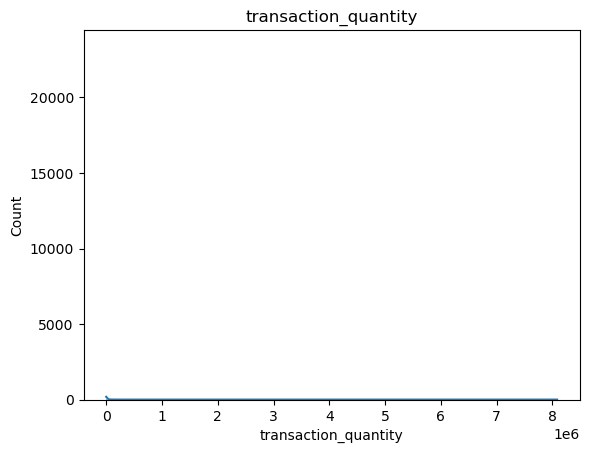

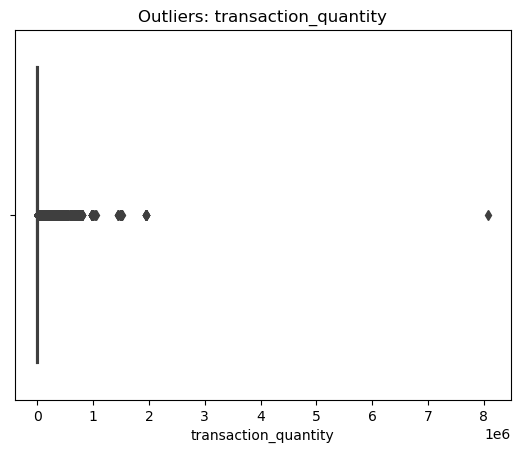

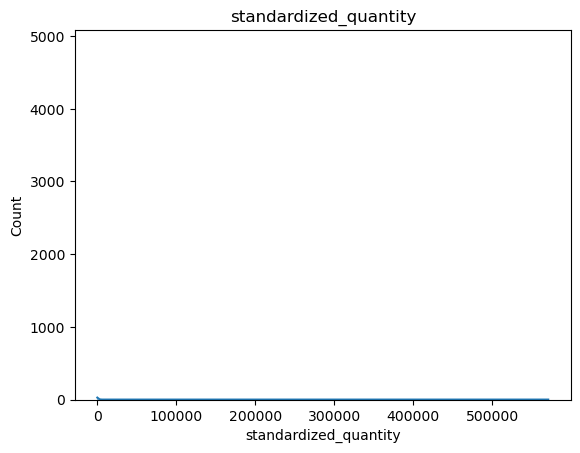

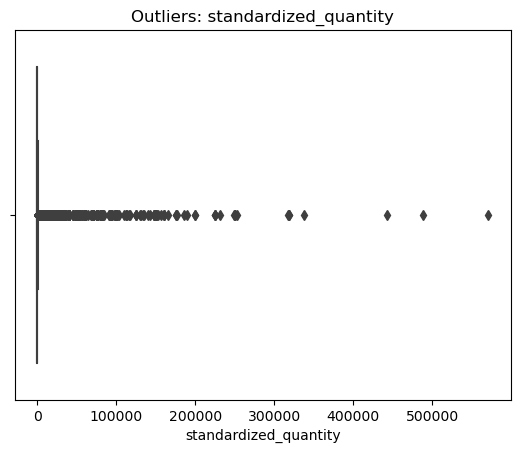

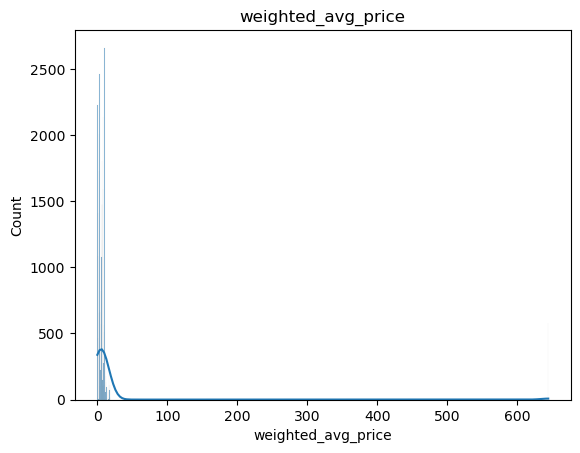

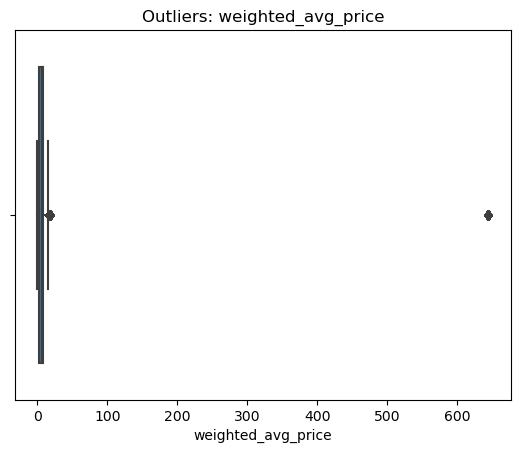

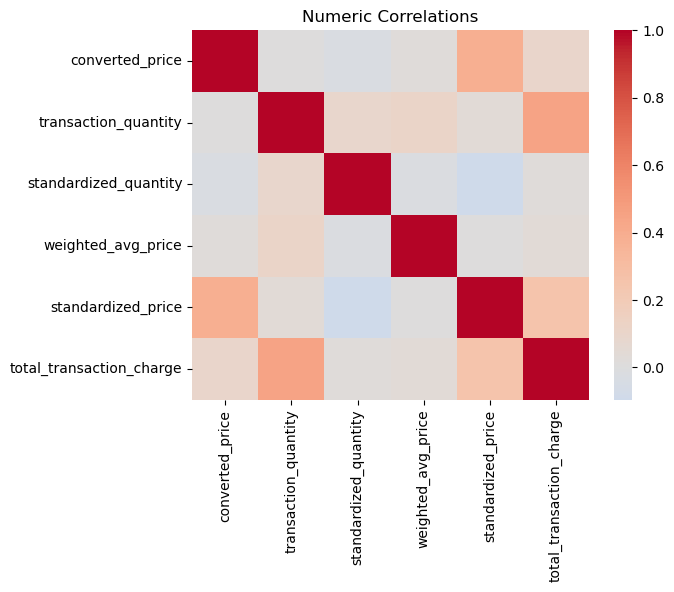

In [6]:
# distributions
num_cols = ['converted_price','transaction_quantity','standardized_quantity','weighted_avg_price']
for c in num_cols:
    sns.histplot(df[c], kde=True); plt.title(c); plt.show()
    sns.boxplot(x=df[c]); plt.title(f'Outliers: {c}'); plt.show()

# correlation heatmap (numeric only)
corr = df[num_cols + ['standardized_price','total_transaction_charge']].corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', center=0); plt.title('Numeric Correlations'); plt.show()


In [50]:
import pandas as pd
import numpy as np

# 1. Load data
path = "/Users/amiraboubezari/Downloads/Clean Data NEW/EQR_master_clean_new.csv"
df_new = pd.read_csv(path)

# 2. Quick shape + peek
print("Shape (rows, columns):", df_new.shape)
df_new.head()


Shape (rows, columns): (37196, 29)


,transaction_unique_id,seller_company_name,customer_company_name,transaction_begin_date,transaction_end_date,trade_date,type_of_rate,time_zone,point_of_delivery_balancing_authority,point_of_delivery_specific_location,...,total_transaction_charge,converted_price,converted_rate_unit,begin_date,end_date,date_difference,transaction_days,delivery_month,product,trade_date_year_mo
0,T1,MRP Pacifica Marketing LLC,East Bay Community Energy Authority,2025-04-01 00:00:00,2025-04-29 23:59:00,2023-07-17,RTO/ISO,PP,CISO,MALAGA_1_AUCTG1,...,6893.0,11.3,$/KW-MO,2025-04-01 00:00:00,2025-04-29 23:59:00,28 days 23:59:00,29 days 00:00:00,2025-04,6.893,2023-07
1,T2,MRP Pacifica Marketing LLC,East Bay Community Energy Authority,2025-05-01 00:00:00,2025-05-30 23:59:00,2023-07-17,RTO/ISO,PP,CISO,MALAGA_1_AUCTG1,...,6893.0,11.3,$/KW-MO,2025-05-01 00:00:00,2025-05-30 23:59:00,29 days 23:59:00,30 days 00:00:00,2025-05,6.893,2023-07
2,T3,MRP Pacifica Marketing LLC,East Bay Community Energy Authority,2025-06-01 00:00:00,2025-06-29 23:59:00,2023-07-17,RTO/ISO,PP,CISO,MALAGA_1_AUCTG1,...,5612.0,9.2,$/KW-MO,2025-06-01 00:00:00,2025-06-29 23:59:00,28 days 23:59:00,29 days 00:00:00,2025-06,5.612,2023-07
3,T10,MRP Pacifica Marketing LLC,East Bay Community Energy Authority,2025-04-01 00:00:00,2025-04-29 23:59:00,2023-07-17,RTO/ISO,PP,CISO,GWFPWR_1_UNITS,...,180800.0,11.3,$/KW-MO,2025-04-01 00:00:00,2025-04-29 23:59:00,28 days 23:59:00,29 days 00:00:00,2025-04,180.800,2023-07
4,T11,MRP Pacifica Marketing LLC,East Bay Community Energy Authority,2025-05-01 00:00:00,2025-05-30 23:59:00,2023-07-17,RTO/ISO,PP,CISO,GWFPWR_1_UNITS,...,180800.0,11.3,$/KW-MO,2025-05-01 00:00:00,2025-05-30 23:59:00,29 days 23:59:00,30 days 00:00:00,2025-05,180.800,2023-07


In [51]:
# Overview of columns, dtypes, and non-null counts
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37196 entries, 0 to 37195
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   transaction_unique_id                  37196 non-null  object 
 1   seller_company_name                    37196 non-null  object 
 2   customer_company_name                  37196 non-null  object 
 3   transaction_begin_date                 37196 non-null  object 
 4   transaction_end_date                   37196 non-null  object 
 5   trade_date                             37190 non-null  object 
 6   type_of_rate                           37184 non-null  object 
 7   time_zone                              37196 non-null  object 
 8   point_of_delivery_balancing_authority  37196 non-null  object 
 9   point_of_delivery_specific_location    37012 non-null  object 
 10  class_name                             31821 non-null  object 
 11  te

In [52]:
# Count and % missing for each column
missing_counts = df_new.isna().sum()
missing_pct = missing_counts / len(df_new) * 100

missing_summary = (
    pd.DataFrame({
        "n_missing": missing_counts,
        "pct_missing": missing_pct.round(2)
    })
    .sort_values("pct_missing", ascending=False)
)

missing_summary.head(25)


,n_missing,pct_missing
class_name,5375,14.45
increment_peaking_name,376,1.01
point_of_delivery_specific_location,184,0.49
standardized_price,10,0.03
standardized_quantity,10,0.03
product,10,0.03
type_of_rate,12,0.03
trade_date_year_mo,6,0.02
trade_date,6,0.02
date_difference,0,0.00


In [53]:
empty_cols = missing_summary[missing_summary["n_missing"] == len(df_new)]
print("Completely empty columns:", empty_cols.index.tolist())


Completely empty columns: []


In [54]:
numeric_cols = df_new.select_dtypes(include=["int64", "float64"]).columns

num_desc = df_new[numeric_cols].describe().T  # mean, std, min, max, etc.
num_desc["var"] = df_new[numeric_cols].var()
num_desc["pct_zero"] = (df_new[numeric_cols] == 0).mean() * 100

num_desc.head()


,count,mean,std,min,25%,50%,75%,max,var,pct_zero
transaction_quantity,37196.0,18909.603849,1.263720e+05,-4.650000e+02,9.850000,35.0,3000.000000,1.193304e+07,1.596987e+10,0.0
price,37196.0,5755.145525,8.077139e+03,1.000000e-02,14.963375,5250.0,7250.000000,1.511279e+05,6.524017e+07,0.0
standardized_quantity,37186.0,772.978732,8.814352e+03,-4.650000e+02,6.000000,20.0,50.000000,5.710000e+05,7.769280e+07,0.0
standardized_price,37186.0,7951.820909,8.478705e+03,1.640000e-02,4750.000000,6600.0,7749.365092,1.511279e+05,7.188844e+07,0.0
total_transaction_charge,37196.0,437242.729910,1.407561e+06,-1.278750e+06,36900.000000,110500.0,325000.000000,3.486974e+07,1.981228e+12,0.0


In [7]:
low_var_numeric = num_desc[num_desc["var"] < 1e-6]  # basically no variation
low_var_numeric


,count,mean,std,min,25%,50%,75%,max,var,pct_zero


In [56]:
df_new = df_new.drop(columns=["price", "standardized_price"])


In [57]:
numeric_cols = df_new.select_dtypes(include=["float64", "int64"]).columns.tolist()
numeric_cols


['transaction_quantity',
 'standardized_quantity',
 'total_transaction_charge',
 'converted_price',
 'product']

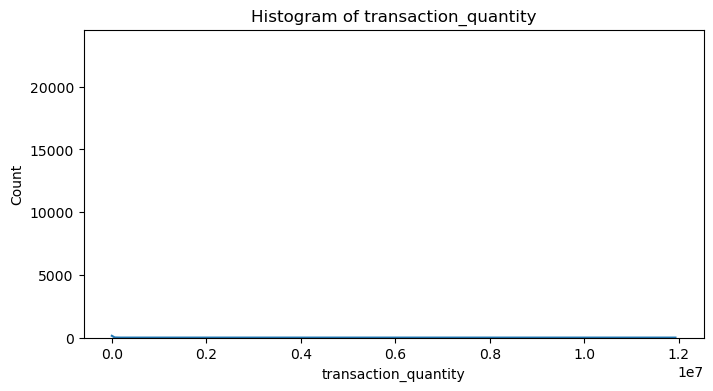

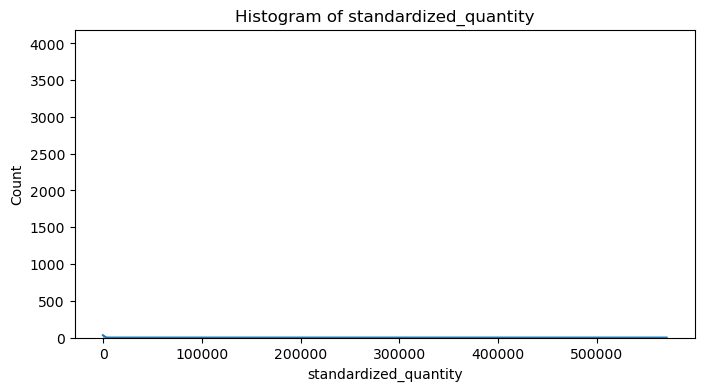

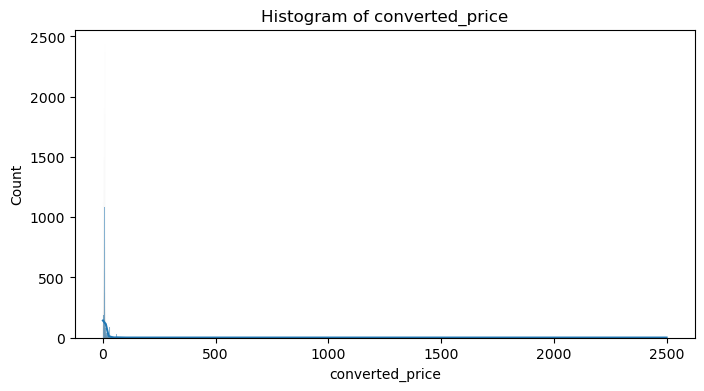

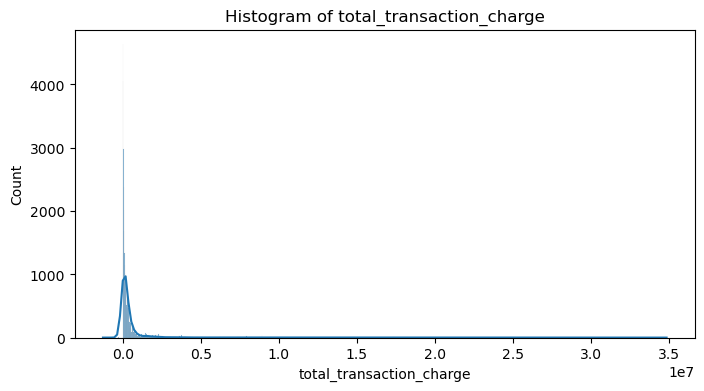

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

key_numeric = [
    "transaction_quantity",
    "standardized_quantity",
    "converted_price",
    "total_transaction_charge"
]

for col in key_numeric:
    plt.figure(figsize=(8,4))
    sns.histplot(df_new[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()


In [15]:
for col in ["transaction_quantity","standardized_quantity","total_transaction_charge"]:
    print(col, (df[col] < 0).sum())


transaction_quantity 25
standardized_quantity 25
total_transaction_charge 25


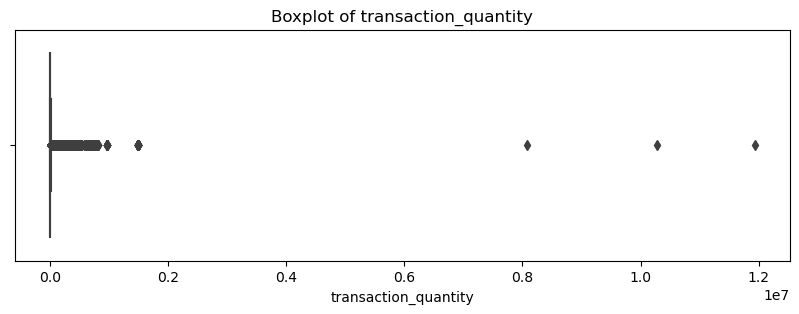

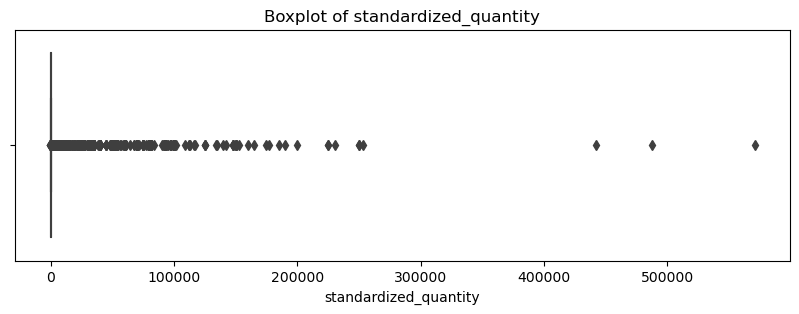

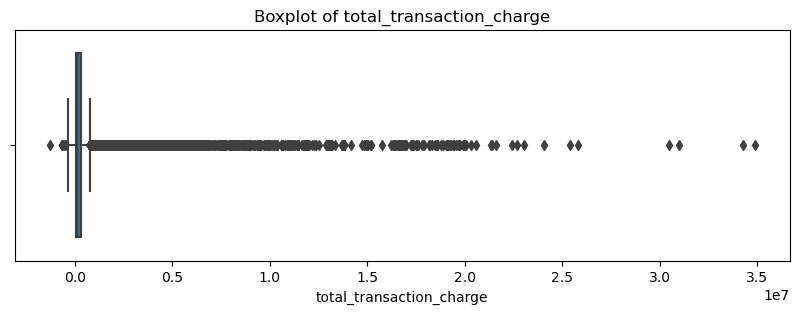

In [59]:
for col in ["transaction_quantity","standardized_quantity","total_transaction_charge"]:
    plt.figure(figsize=(10,3))
    sns.boxplot(x=df_new[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


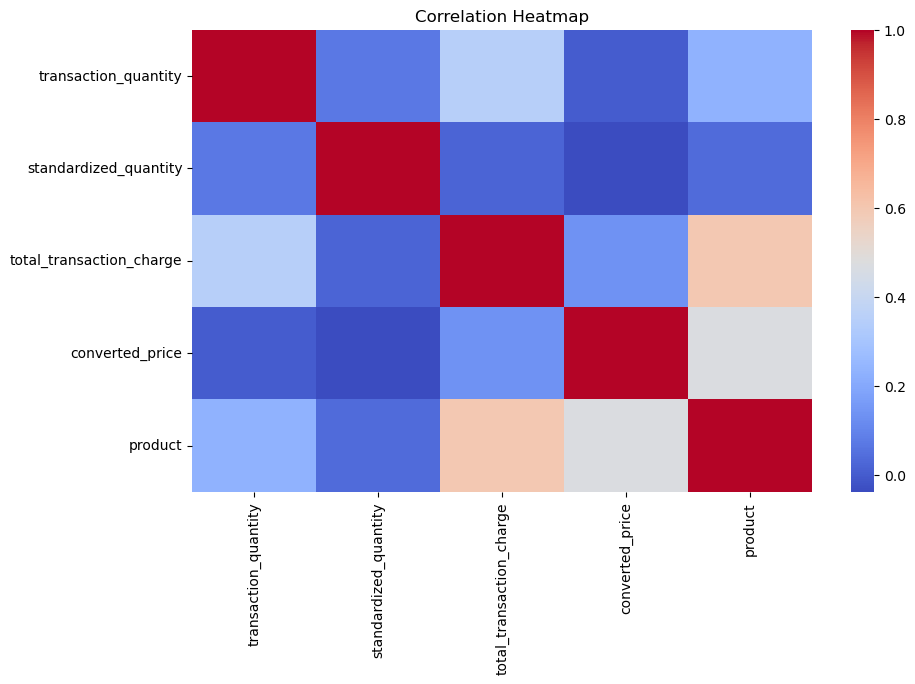

In [60]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df_new[numeric_cols].corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X = df_new[numeric_cols].fillna(0)  # temporary
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif


,Variable,VIF
0,transaction_quantity,1.172489
1,standardized_quantity,1.008869
2,total_transaction_charge,1.764204
3,converted_price,1.350273
4,product,2.049917


In [62]:
cat_cols = df_new.select_dtypes(exclude=["float64", "int64"]).columns.tolist()
cat_cols


['transaction_unique_id',
 'seller_company_name',
 'customer_company_name',
 'transaction_begin_date',
 'transaction_end_date',
 'trade_date',
 'type_of_rate',
 'time_zone',
 'point_of_delivery_balancing_authority',
 'point_of_delivery_specific_location',
 'class_name',
 'term_name',
 'increment_name',
 'increment_peaking_name',
 'rate_units',
 'converted_rate_unit',
 'begin_date',
 'end_date',
 'date_difference',
 'transaction_days',
 'delivery_month',
 'trade_date_year_mo']

In [63]:
df_new['seller_company_name'].value_counts().head(15)


Calpine Energy Services, L.P.           11004
EDF Trading North America, LLC           1590
Geysers Power Company, LLC               1569
NRG Power Marketing LLC                  1438
Constellation Energy Generation, LLC     1412
Pacific Gas and Electric Company         1263
Exelon Generation Company, LLC            970
Sunrise Power Company, LLC                899
Tenaska Power Services Co.                893
CalPeak Power LLC                         774
The Energy Authority, Inc.                655
High Desert Power Project, LLC            613
Long Beach Generation LLC                 547
NRG Business Marketing LLC                537
Dynegy Marketing and Trade, LLC           520
Name: seller_company_name, dtype: int64

In [64]:
df_new['customer_company_name'].value_counts().head(15)


California Choice Energy Authority             2294
Southern California Edison Company             2064
Calpine Energy Services, L.P.                  2040
CONSTELLATION NEWENERGY INC                    1957
Calpine Energy Solutions, LLC                  1799
Pacific Gas and Electric Company               1499
Marin Clean Energy                             1318
EDF Trading North America, LLC                 1022
Calpine Power America - CA, LLC                1001
NRG Power Marketing LLC                         889
EDF Industrial Power Services (CA), LLC         783
CalPeak Power LLC                               775
East Bay Community Energy Authority             756
Clean Power Alliance of Southern California     738
Exelon Generation Company, LLC                  725
Name: customer_company_name, dtype: int64

In [65]:
df_new['type_of_rate'].value_counts()


Fixed             30370
Formula            2815
FIXED              2506
RTO/ISO            1264
FORMULA             205
Electric Index       24
Name: type_of_rate, dtype: int64

In [66]:
df_new['increment_name'].value_counts().head(15)


Y    22839
M    14357
Name: increment_name, dtype: int64

In [67]:
df_new['point_of_delivery_specific_location'].value_counts().head(15)


CAP-CAISO-SYSTEM-NP15                4719
CAP-CAISO-LOCAL-BAY AREA             2145
NP15                                 1702
CAISO - SP15 Capacity - System       1673
Facility Interconnection Point       1415
CISO                                 1305
CAP-CAISO-LOCAL-BIG CREEK/VENTURA    1232
CAP-CAISO-LOCAL-NCNB                 1159
CAISO - LA Basin Capacity            1057
CAP-CAISO-SYSTEM-SP15                 931
CAP-CAISO-LOCAL-PG&E OTHER            878
CAISO - NP15 Capacity                 797
RA SAN DIEGO                          733
SP15                                  705
North System                          587
Name: point_of_delivery_specific_location, dtype: int64

In [68]:
df_new['rate_units'].value_counts()


$/MW-MO     27867
$/KW-MO      9295
$/MW-DAY       34
Name: rate_units, dtype: int64

In [69]:
df_new['class_name'].value_counts()


F     18702
UP    11809
NF     1265
BA       45
Name: class_name, dtype: int64

In [70]:
df_new['term_name'].value_counts()


LT    29590
ST     7606
Name: term_name, dtype: int64

In [71]:
vars_to_adjust = [
    "transaction_quantity",
    "standardized_quantity",
    "total_transaction_charge"
]

percentiles = {}

for col in vars_to_adjust:
    cutoff = df_new[col].quantile(0.995)  # 99.5th percentile
    percentiles[col] = cutoff
    print(f"{col}: 99.5th percentile cutoff = {cutoff:.2f}")

percentiles


transaction_quantity: 99.5th percentile cutoff = 571375.00
standardized_quantity: 99.5th percentile cutoff = 50000.00
total_transaction_charge: 99.5th percentile cutoff = 9875020.26


{'transaction_quantity': 571375.0000000219,
 'standardized_quantity': 50000.0,
 'total_transaction_charge': 9875020.261750013}

In [72]:
mask = (
    (df_new["transaction_quantity"] <= percentiles["transaction_quantity"]) &
    (df_new["standardized_quantity"] <= percentiles["standardized_quantity"]) &
    (df_new["total_transaction_charge"] <= percentiles["total_transaction_charge"])
)

df_removed = df_new[~mask]   # optional: review removed rows
df_new = df_new[mask].reset_index(drop=True)

print("Rows removed:", len(df_removed))
print("Rows remaining:", len(df_new))


Rows removed: 526
Rows remaining: 36670


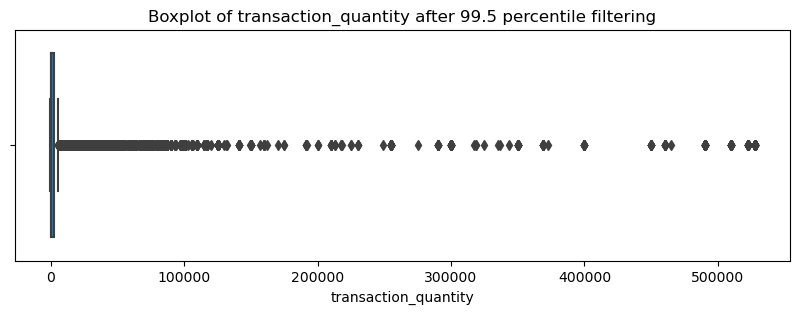

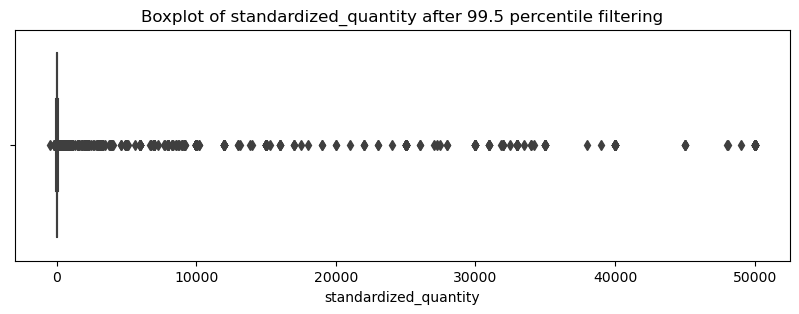

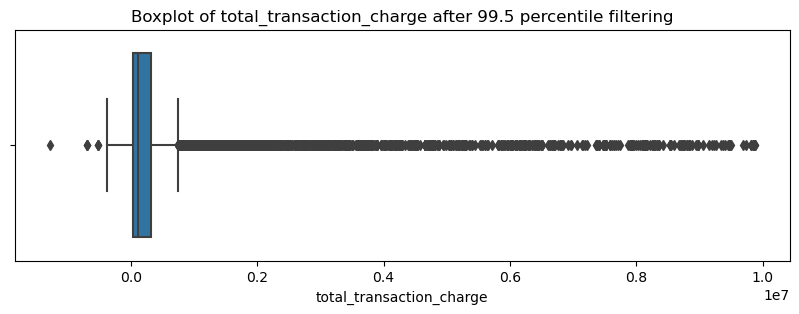

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in vars_to_adjust:
    plt.figure(figsize=(10, 3))
    sns.boxplot(x=df_new[col])
    plt.title(f"Boxplot of {col} after 99.5 percentile filtering")
    plt.show()


In [77]:
for col in numeric_cols:
    negatives = (df_new[col] < 0).sum()
    print(f"{col}: {negatives} negative values")


transaction_quantity: 25 negative values
standardized_quantity: 25 negative values
total_transaction_charge: 25 negative values
converted_price: 0 negative values
product: 25 negative values


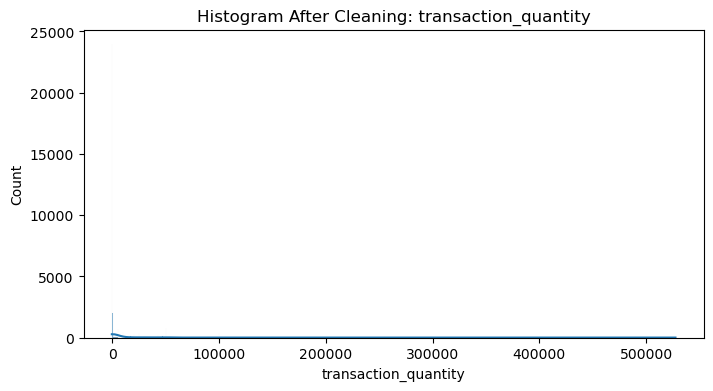

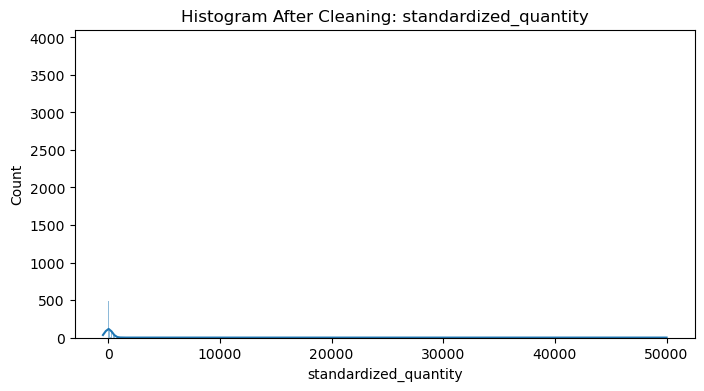

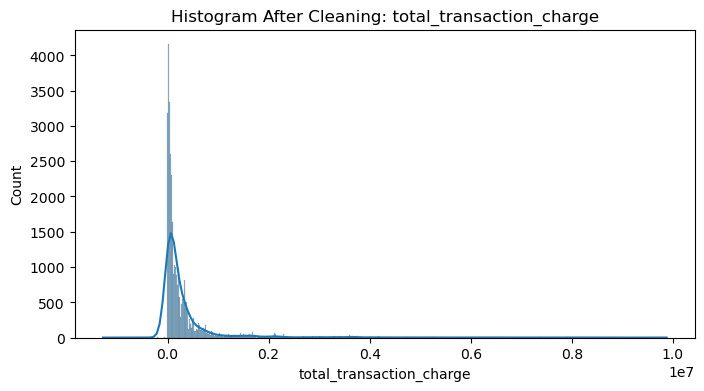

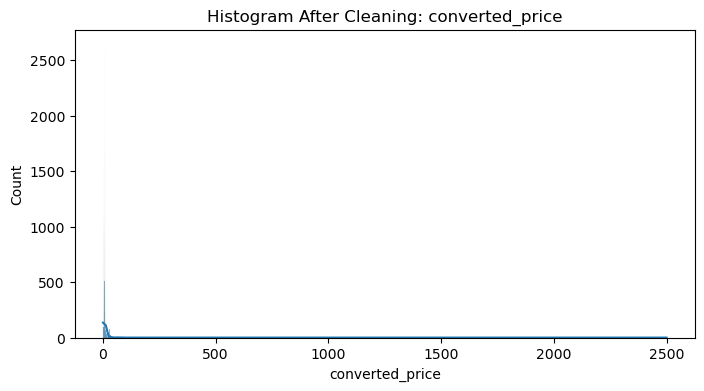

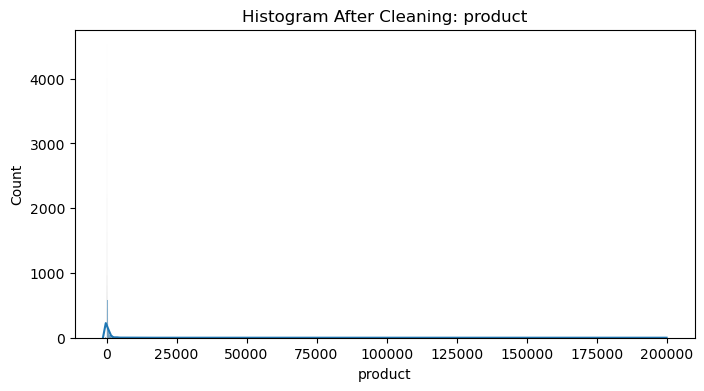

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_new[col], kde=True)
    plt.title(f"Histogram After Cleaning: {col}")
    plt.show()


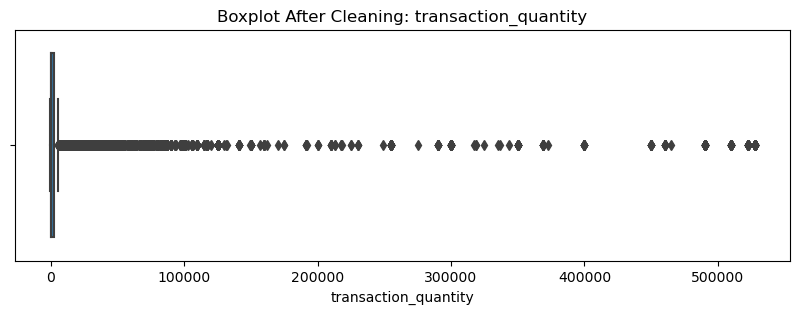

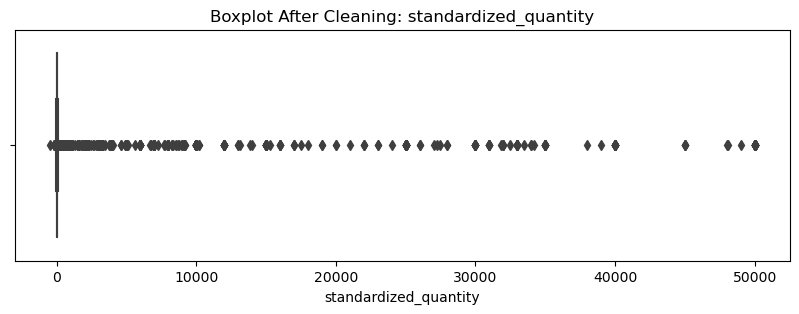

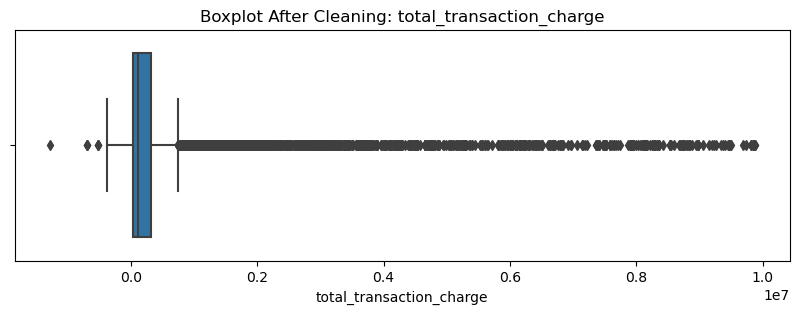

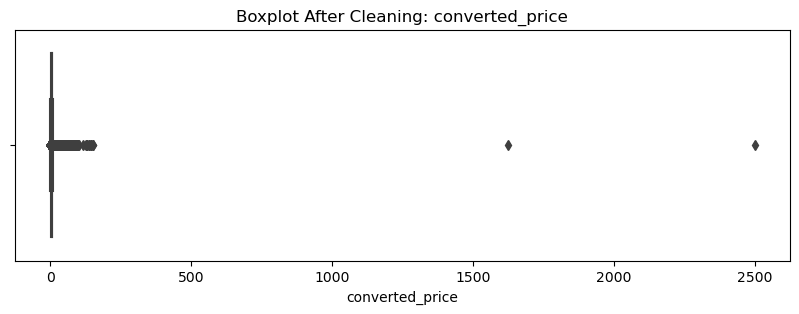

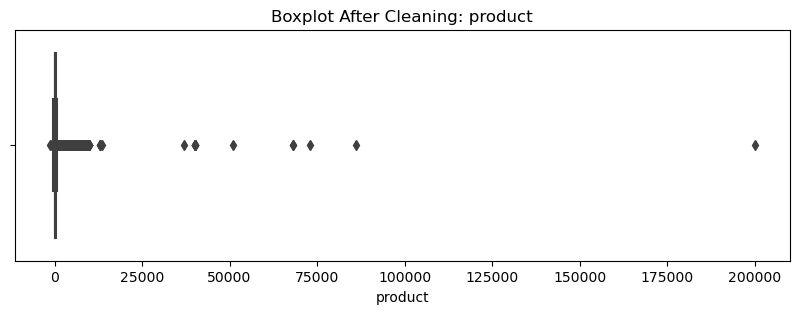

In [79]:
for col in numeric_cols:
    plt.figure(figsize=(10, 3))
    sns.boxplot(x=df_new[col])
    plt.title(f"Boxplot After Cleaning: {col}")
    plt.show()


In [81]:
df_new = df_new[
    (df_new['transaction_quantity'] >= 0) &
    (df_new['standardized_quantity'] >= 0) &
    (df_new['total_transaction_charge'] >= 0) &
    (df_new['product'] >= 0)
]


In [82]:
(df_new[numeric_cols] < 0).sum()



transaction_quantity        0
standardized_quantity       0
total_transaction_charge    0
converted_price             0
product                     0
dtype: int64

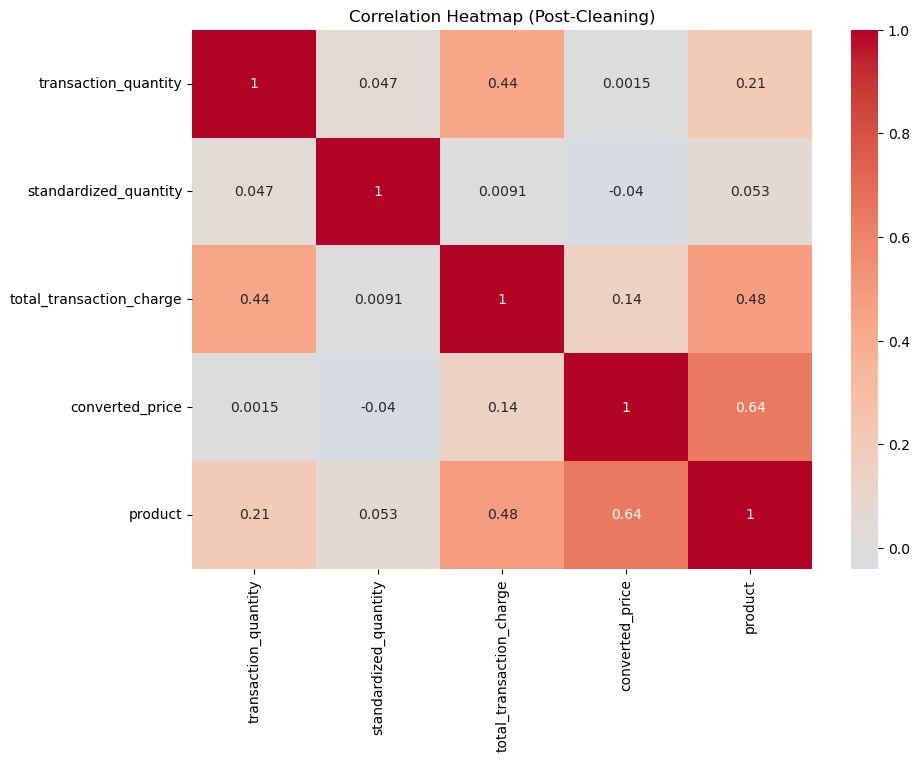

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation
corr_clean = df_new[numeric_cols].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr_clean, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap (Post-Cleaning)")
plt.show()


In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# VIF calculation requires no NaNs
X = df_new[numeric_cols].dropna()

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data


,Variable,VIF
0,transaction_quantity,1.316867
1,standardized_quantity,1.011592
2,total_transaction_charge,1.689105
3,converted_price,1.811435
4,product,2.295689


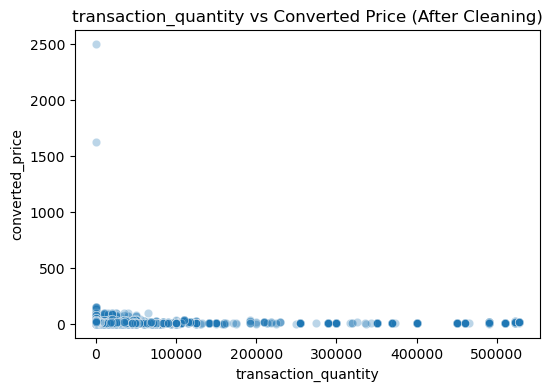

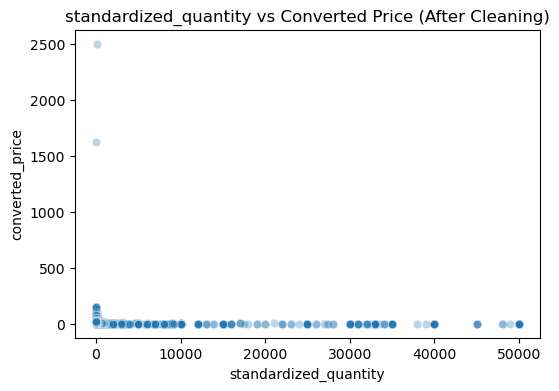

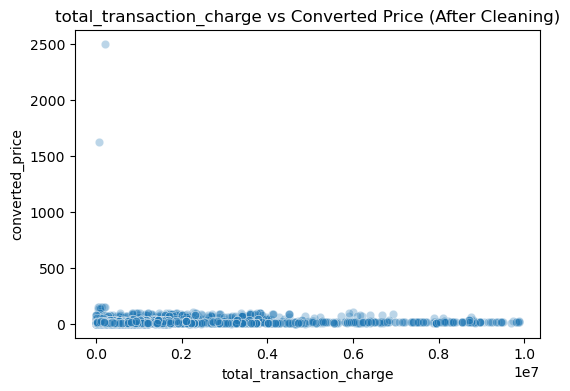

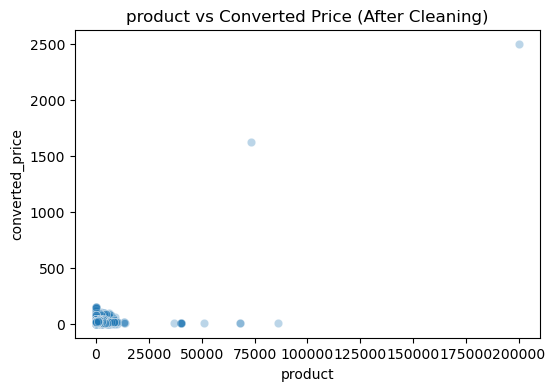

In [85]:
for col in ['transaction_quantity', 'standardized_quantity', 'total_transaction_charge', 'product']:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df_new, x=col, y='converted_price', alpha=0.3)
    plt.title(f"{col} vs Converted Price (After Cleaning)")
    plt.show()


In [86]:
# Identify categorical columns
categorical_cols = df_new.select_dtypes(include=['object']).columns.tolist()

print("Categorical columns:", categorical_cols)

# Inspect distributions
for col in categorical_cols:
    print(f"\n===== {col} =====")
    vc = df_new[col].value_counts(dropna=False)
    print(vc.head(15))          # top 15 categories
    print("Unique categories:", df_new[col].nunique())
    print("Rare categories (<20 rows):", sum(vc < 20))


Categorical columns: ['transaction_unique_id', 'seller_company_name', 'customer_company_name', 'transaction_begin_date', 'transaction_end_date', 'trade_date', 'type_of_rate', 'time_zone', 'point_of_delivery_balancing_authority', 'point_of_delivery_specific_location', 'class_name', 'term_name', 'increment_name', 'increment_peaking_name', 'rate_units', 'converted_rate_unit', 'begin_date', 'end_date', 'date_difference', 'transaction_days', 'delivery_month', 'trade_date_year_mo']

===== transaction_unique_id =====
T1     876
T2     778
T3     733
T4     453
T5     449
T6     428
T7     357
T8     311
T9     307
T11    224
T10    203
T12    195
T13    156
T15    138
T14    134
Name: transaction_unique_id, dtype: int64
Unique categories: 25527
Rare categories (<20 rows): 25464

===== seller_company_name =====
Calpine Energy Services, L.P.           11004
EDF Trading North America, LLC           1590
Geysers Power Company, LLC               1569
NRG Power Marketing LLC                  1438
C

In [87]:
cols_to_drop = [
    'transaction_unique_id', 
    'converted_rate_unit', 
    'point_of_delivery_balancing_authority',
    'time_zone'
]
df_new = df_new.drop(columns=cols_to_drop)


In [88]:
df_new.columns.tolist()


['seller_company_name',
 'customer_company_name',
 'transaction_begin_date',
 'transaction_end_date',
 'trade_date',
 'type_of_rate',
 'point_of_delivery_specific_location',
 'class_name',
 'term_name',
 'increment_name',
 'increment_peaking_name',
 'transaction_quantity',
 'rate_units',
 'standardized_quantity',
 'total_transaction_charge',
 'converted_price',
 'begin_date',
 'end_date',
 'date_difference',
 'transaction_days',
 'delivery_month',
 'product',
 'trade_date_year_mo']

In [89]:
df_new["product"] = df_new["converted_price"] * df_new["standardized_quantity"]


In [90]:
wap_monthly = (
    df_new.groupby("trade_date_year_mo")
          .apply(lambda x: (x["product"].sum() / x["standardized_quantity"].sum()))
          .reset_index(name="weighted_avg_price")
)


In [91]:
wap_monthly = wap_monthly.sort_values(by="trade_date_year_mo")
wap_monthly.head()


,trade_date_year_mo,weighted_avg_price
0,2002-04,14.251082
1,2006-04,6.837477
2,2007-04,1.850000
3,2007-08,14.116104
4,2008-03,8.469073


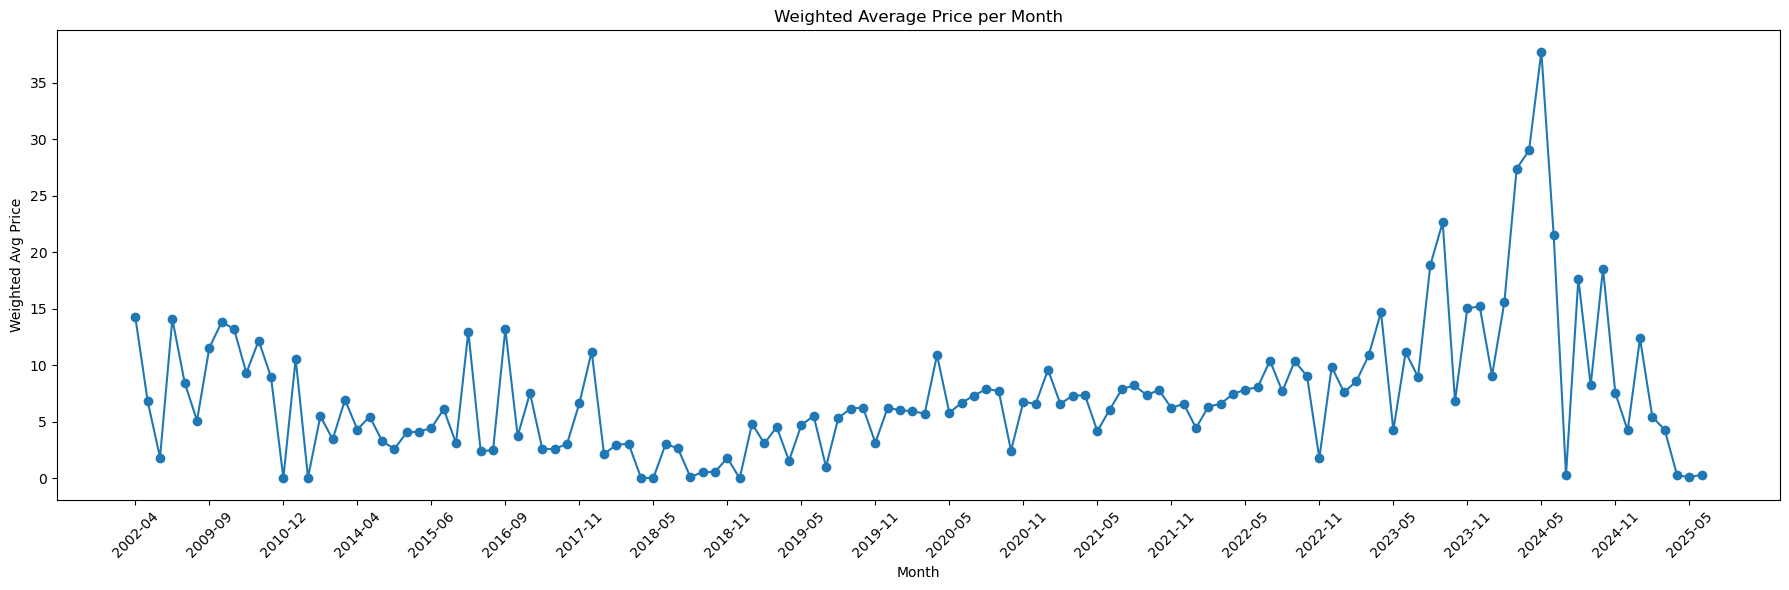

In [95]:
plt.figure(figsize=(18,6))
plt.plot(wap_monthly['trade_date_year_mo'], wap_monthly['weighted_avg_price'], marker='o')

# show fewer xticks (every 6 months)
plt.xticks(wap_monthly['trade_date_year_mo'][::6], rotation=45)

plt.title("Weighted Average Price per Month")
plt.xlabel("Month")
plt.ylabel("Weighted Avg Price")
plt.tight_layout()
plt.show()
